# TD 3 | Étude de la marge EGT d'un turboréacteur

---

Objectifs du TD :

* pratiquer sur un premier use case concret d'analyse de données de moteurs d'avion
* fonctions glissantes pandas (_rolling_)
* régression linéaire

---

La table fournie contient les données moteurs disposant de l'information "marge EGT" (egthdm) issue
des rapports ACARS. Il s'agit donc uniquement de rapports extraits au décollage (TAKEOFF). On a
récupéré l'ensemble des rapports des moteurs livrés depuis avril 2016.

## 1. Chargement et nettoyage des données

#### 1.1. Chargez les données ACARS à l'aide de la méthode pandas `read_excel`. Explorez les propriétés générales du jeu de données.

Fichier de données : `./data/accars_b.xlsx`.

In [ ]:
!git clone https://github.com/MadaneA/MACS3-Statistiques-Descriptives-TDs.git

In [ ]:
import os
os.chdir('MACS3-Statistiques-Descriptives-TDs')

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_excel("accars_b.xlsx")

In [42]:
df.head()

,flight_phase,engine_number,engine_type,aircraft_number,engine_position,airline_classif_environment,brat,cas,cycles,delfn,...,ztoil,zvb1f,zvb1r,zvb2f,zvb2r,zvsv,zwbp1,zwbp2,zwf36,zxm
0,CLIMB,186,10,192,1,Neutral,1.0,151.0,6.0,-0.1146,...,88.0,0.57,0.73,0.12,0.13,8.9,5.0,5.0,5335.0,0.637
1,CLIMB,186,10,192,1,Neutral,1.0,143.0,7.0,-0.2464,...,90.8,0.58,0.76,0.15,0.10,9.0,5.6,5.6,4987.0,0.624
2,CLIMB,186,10,192,1,Neutral,1.0,163.0,8.0,NaN,...,89.0,0.28,0.48,0.16,0.05,10.1,5.0,5.2,4251.0,0.530
3,CLIMB,186,10,192,1,Neutral,1.0,152.0,9.0,NaN,...,87.0,0.44,0.67,0.14,0.08,8.9,5.6,5.6,5356.0,0.380
4,CLIMB,186,10,192,1,Neutral,1.0,154.0,10.0,NaN,...,85.3,0.26,0.48,0.25,0.06,10.5,5.6,5.6,NaN,0.543


#### 1.2. Y a-t-il des valeurs manquantes ? Si oui, décrivez leur répartition et affichez le nombre de valeurs manquantes par colonne sous forme d'un bar plot.

<BarContainer object of 50 artists>

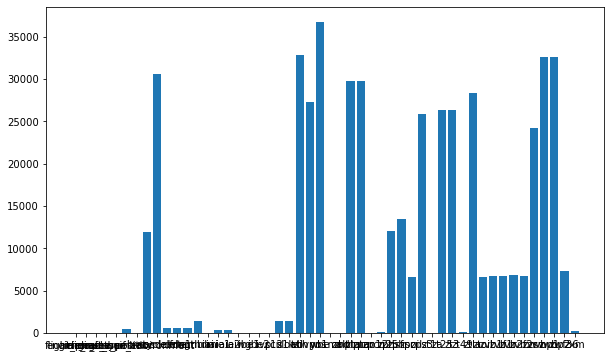

In [43]:
dff=df.isna()
dff.head()
#on a des valeurs manquantes 
somme=dff.sum(axis=0)
somme
plt.figure(figsize=(10,6))

plt.bar(np.arange(df.columns.size), somme, tick_label=df.columns)

#### 1.3. Ne gardez que les lignes où le nombre de cycles (variable `cycles`) et la marge EGT (variable `egthdm`) sont présentes.

In [45]:
df_2=df.dropna(subset=['cycles', 'egthdm'])
df_2

,flight_phase,engine_number,engine_type,aircraft_number,engine_position,airline_classif_environment,brat,cas,cycles,delfn,...,ztoil,zvb1f,zvb1r,zvb2f,zvb2r,zvsv,zwbp1,zwbp2,zwf36,zxm
104,TAKEOFF,186,10,192,1,Neutral,0.0,88.0,5.0,23.8191,...,84.3,0.39,0.58,0.05,0.15,12.3,0.2,0.0,NaN,0.133
105,TAKEOFF,186,10,192,1,Neutral,0.0,93.0,6.0,25.4038,...,95.1,0.24,0.69,0.16,0.10,11.1,0.2,0.0,NaN,0.148
106,TAKEOFF,186,10,192,1,Neutral,0.0,92.0,7.0,22.7509,...,81.6,0.23,0.46,0.13,0.11,12.1,0.3,0.0,NaN,0.140
107,TAKEOFF,186,10,192,1,Neutral,0.0,87.0,8.0,22.1533,...,87.8,0.59,0.80,0.12,0.13,11.1,0.2,0.0,NaN,0.140
108,TAKEOFF,186,10,192,1,Neutral,0.0,88.0,9.0,23.8673,...,79.3,0.43,0.47,0.13,0.17,12.5,0.3,0.0,NaN,0.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46575,TAKEOFF,289,7,153,2,Neutral,1.0,NaN,19.0,13.0466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.292
46576,TAKEOFF,289,7,153,2,Neutral,1.0,NaN,44.0,12.7586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286
46577,TAKEOFF,289,7,153,2,Neutral,1.0,NaN,67.0,14.8291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304
46599,TAKEOFF,328,7,154,2,Neutral,1.0,NaN,32.0,12.7096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286


#### 1.4. Affichez les différents types de moteurs (indice : utilisez la méthode `unique()`).

In [46]:
type_moteur_df=df_2["engine_type"]
type_moteur=np.unique(type_moteur_df)
type_moteur

array([ 5,  7, 10], dtype=int64)

#### 1.5. Sélectionnez uniquement les moteurs de type 10. Combien y a-t-il d'avions distincts ? Combien de vols par avion ? (attention : il y a 2 moteurs sur un avion)

In [206]:
df_moteur_10=df_2[ df_2['engine_type'] == 10 ]
len(np.unique(df_moteur_10['aircraft_number']))

5

## 2. Étude de la marge EGT de l'avion 190

#### 2.1. Récupérez les variables `engine_number`, nombre de cycles (`cycles`) et marge EGT (`egthdm`) pour l'avion identifié par le numéro 190.

In [92]:
df_num_vol=df_2[df_2['aircraft_number'] == 190 ]
num_moteur=df_num_vol['engine_number']
nb_cycles=df_num_vol['cycles']
marge_EGT=df_num_vol['egthdm']
print(num_moteur,nb_cycles,marge_EGT)
df_num_vol.tail()

11398    179
11399    180
11400    180
11755    179
11756    179
        ... 
45809    180
45810    180
46111    179
46411    179
46412    179
Name: engine_number, Length: 220, dtype: int64 11398     98.0
11399     69.0
11400     75.0
11755      0.0
11756      1.0
         ...  
45809     48.0
45810     58.0
46111    163.0
46411     30.0
46412    101.0
Name: cycles, Length: 220, dtype: float64 11398    52.0118
11399    57.6415
11400    48.7217
11755    37.6572
11756    37.2208
          ...   
45809    51.9444
45810    59.0032
46111    45.8711
46411    56.5585
46412    41.0874
Name: egthdm, Length: 220, dtype: float64


,flight_phase,engine_number,engine_type,aircraft_number,engine_position,airline_classif_environment,brat,cas,cycles,delfn,...,ztoil,zvb1f,zvb1r,zvb2f,zvb2r,zvsv,zwbp1,zwbp2,zwf36,zxm
45809,TAKEOFF,180,10,190,2,Neutral,0.0,86.0,48.0,24.0682,...,95.4,0.03,0.41,0.49,0.64,12.4,0.0,0.0,NaN,0.132
45810,TAKEOFF,180,10,190,2,Neutral,0.0,86.0,58.0,19.5614,...,87.7,0.02,0.37,0.35,0.50,11.8,0.0,0.0,NaN,0.133
46111,TAKEOFF,179,10,190,1,Neutral,0.0,87.0,163.0,23.3822,...,93.0,0.13,0.23,0.17,0.18,11.5,0.0,0.0,NaN,0.141
46411,TAKEOFF,179,10,190,1,Neutral,0.0,85.0,30.0,22.6940,...,96.6,0.13,0.51,0.23,0.11,12.3,0.0,0.0,NaN,0.130
46412,TAKEOFF,179,10,190,1,Neutral,0.0,91.0,101.0,0.1767,...,85.3,0.32,0.36,0.17,0.05,10.1,0.0,0.0,NaN,0.140


#### 2.2. Affichez la courbe de l'évolution de la marge EGT au cours du temps pour les deux moteurs de l'avion, sur deux graphes séparés et en prenant soin d'ajouter des légendes.

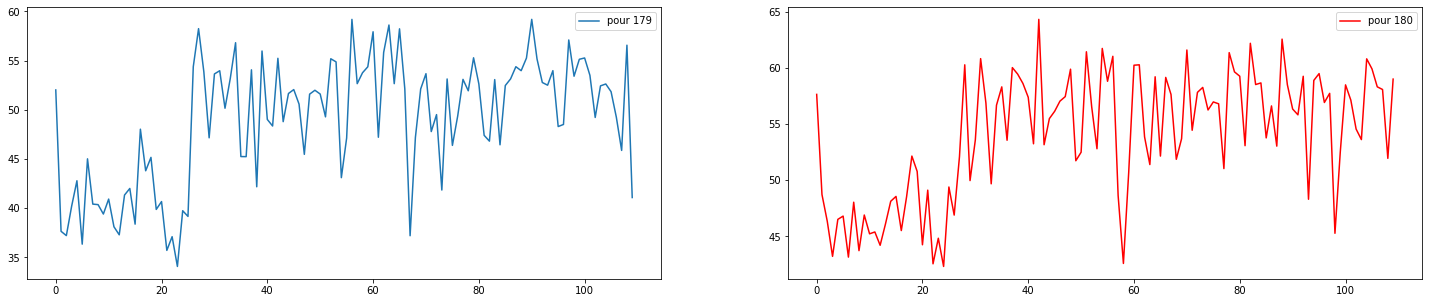

In [91]:
index_1=df_num_vol[df_num_vol['engine_number']==179].index
index_2=df_num_vol[df_num_vol['engine_number']==180].index
marge_EGT_1=marge_EGT[index_1]
marge_EGT_2=marge_EGT[index_2]
t1=range(len(marge_EGT_1))
t2=range(len(marge_EGT_2))
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
plt.plot(t1,marge_EGT_1,label='pour 179')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(t1,marge_EGT_2,'red',label='pour 180')
plt.legend()

#### 2.3. Pour la suite, on ne s'intéresse qu'au moteur 179. Quel est le nombre de vols manquant dans les données ?

In [89]:

nb_cycles_179=nb_cycles[index_1]
list_nb_cycles_179=nb_cycles_179.tolist()

list_sort=list(set(sorted(list_nb_cycles_179)))
list_sort
nb_manquant=164-len(list_sort)
nb_manquant



73

2.4. Nettoyage de la marge EGT

On constate que sur un même cycle, il peut y avoir 2 valeurs de la variable `egthdm` mesurées. On ne souhaite garder que la plus grande des deux, et avoir une seule ligne par cycle, afin que l'on puisse utiliser le nombre de cycles comme index. Enfin, on veut compléter l'index pour les vols manquants, en remplissant les lignes par `NaN`. Pour cela, effectuez l'exercice suivant:

1. Utilisez une aggrégation pour obtenir la plus grande valeur à chaque cycle et stockez le résultat dans une Series pandas appelée 'egt'.
2. Ré-indexez le DataFrame pour avoir une ligne pour tout nombre de cycles (indice : passez par la méthode reindex).

In [128]:
df_av190_179=df_num_vol[df_num_vol['engine_number']==179]
egt=df_av190_179.groupby(by="cycles").max().loc[:,"egthdm"]
egt=egt.reindex(range(164))
egt


cycles
0      37.6572
1      59.1796
2      56.8104
3      55.2263
4      55.1283
        ...   
159        NaN
160        NaN
161        NaN
162        NaN
163    45.8711
Name: egthdm, Length: 164, dtype: float64

#### 2.5. On souhaite lisser les valeurs et se débarasser des outliers à l'aide d'une médiane glissante sur 15 cycles. Affichez sur un même graphe la marge EGT brute (points) et la marge lissée (ligne).
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html#pandas.Series.rolling

Utilisez une fenêtre glissante de taille 15 cycles, avec un minimum de 3 observations non-nulles par fenêtre (paramètre `min_periods`).

In [198]:
marge_lissé=egt.rolling(15, min_periods=3).median()
marge_lissé


cycles
0           NaN
1           NaN
2      56.81040
3      56.01835
4      55.22630
         ...   
159         NaN
160         NaN
161         NaN
162         NaN
163         NaN
Name: egthdm, Length: 164, dtype: float64

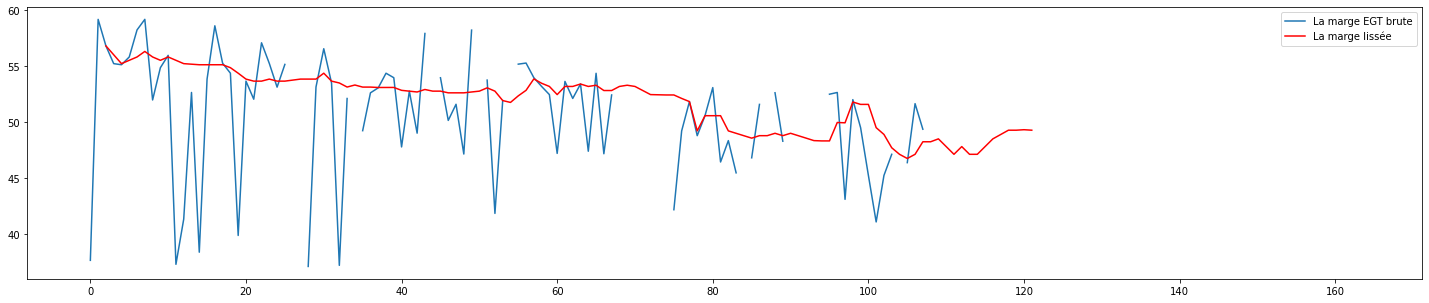

In [133]:
t=range(164)
fig = plt.figure(figsize=(25,5))
plt.plot(t,egt,label='La marge EGT brute')
plt.plot(t,marge_lissé,'red',label='La marge lissée')
plt.legend()

#### 2.6. Nettoyage de la marge EGT lissée

La marge EGT ne peut être que décroissante, sauf en cas de nettoyage moteur (waterwash) ou peut-être à cause d'éléments extérieurs, on va donc éviter de tenir compte des remontées de marge et ne prendre en considération que les points descendants. Cette estimation est pessimiste mais évite de prendre en compte ces facteurs extérieurs.

1. Calculez une série ne contenant que les valeurs décroissantes de la amrge EGT lissée.
2. Sur le graphique précédent, ajoutez ces points par-dessus la courbe.

In [199]:
serie=[]
serie.append(marge_lissé[2])
j=0
for i in range(3,164):
    if(marge_lissé[i]<=serie[j]):
        serie.append(marge_lissé[i])
        j=len(serie)-1  
    else:
        serie=serie
        

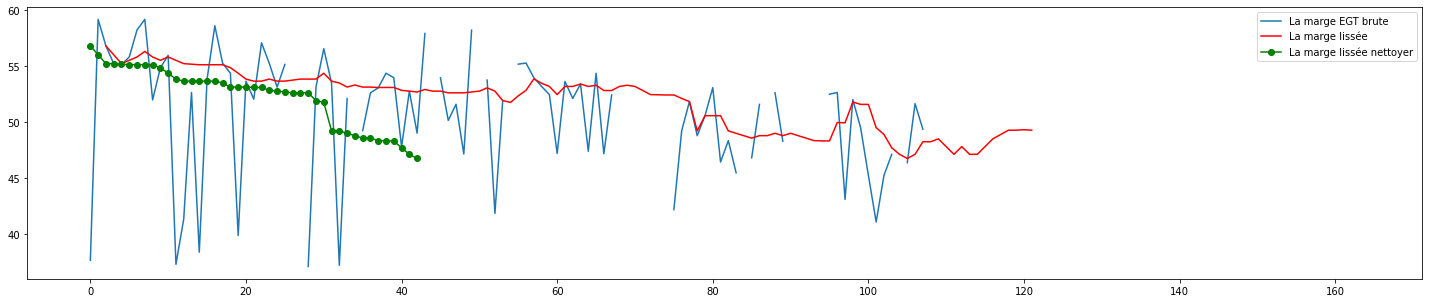

In [207]:
serie
fig = plt.figure(figsize=(25,5))
plt.plot(t,egt,label='La marge EGT brute')
plt.plot(t,marge_lissé,'red',label='La marge lissée')
plt.plot(serie,marker="o",color='green',label='La marge lissée nettoyer')
plt.legend()

#### 2.7. Estimation de la pente de la marge EGT

La pente de la marge EGT est un indicateur très intéressant de l'usure du moteur. On l'estime par régression linéaire par rapport au nombre de cycles. Pour cela, on utilise les points conservés précédemment qui constituent une estimation pessimiste.

Pour la régression linéaire, on utilisera le modèle `LinearRegression` de scikit-learn. Son utilisation est similaire aux autres modèles de scikit-learn :
```python
lr = LinearRegression()
model = lr.fit(X, y)
```

1. Apprenez un modèle `LinearRegression` sur les données calculées précédemment. Affichez les coefficients et l'ordonnée à l'origine (_intercept_) du modèle obtenu. Les valeurs sont-elles cohérentes ? (indices : pour passer d'un objet pandas (DataFrame ou Series) à un array numpy, utilisez la propriété `values`)
2. Tracez la droite obtenue sur le graphe précédent.

In [ ]:
from sklearn.linear_model import LinearRegression

### 3. Écriture d'une fonction de calcul de la pente EGT pour tous les moteurs

Tout d'abord, bravo si vous êtes arrivés jusque là ! Toutes les opérations que l'on a effectuées ont permis d'estimer la pente de la marge EGT du moteur 179 de l'avion 190 de type 10, et donc son usure. Maintenant, on souhaite répéter ce processus sur tous les moteurs ! Pour cela, il faudra créer une fonction Python générique, prenant en entrée l'ensemble du jeu de données ACARS et produisant en sortie l'ensemble des pentes/intercept des modèles de régression linéaire appris pour chaque moteur.

L'un des intérêts est de pouvoir prédire l'usure des moteurs, après un nombre de cycles donné.

Voici le squelette de la fonction à écrire (en ré-utilisant et adaptant tout les morceaux de code précédents) :

```python
def regress_egt_margin(df_acars):
    ...
    return df_regress_models # Contient les pentes et intercept pour tous les moteurs
```

### 4. Comparaison de l'usure des 3 types de moteurs

#### 4.1. Prédiction de la marge EGT au 150ème par type de moteur

1. Pour chaque moteur, utilisez son modèle de régression pour prédire la valeur de la marge EGT après 150 cycles d'utilisation (indice : méthode `apply`).
2. Représentez ces valeurs par type moteur sur un box plot. Décrivez le résultat obtenu.
3. Calculez la moyenne de la marge au 150ème cycle par type de moteur. Quel type de moteur a la plus grande marge moyenne après 150 cycles ?

#### 4.3. Vitesse de décroissance de la marge EGT par type de moteur

La pente de la marge EGT correspond à sa vitesse de décroissance par cycle.

1. Quelle est son unité ?
2. Représentez ces valeurs par type de moteur sur un boxplot. Décrivez le résultat obtenu.
3. Calculez moyenne de la pente par type de moteur. Quel type de moteur a la plus faible vitesse de décroissance et donc la plus faible vitesse d'usure ?